In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [20]:
df=pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [21]:
pd.Series(df['Gender']).value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

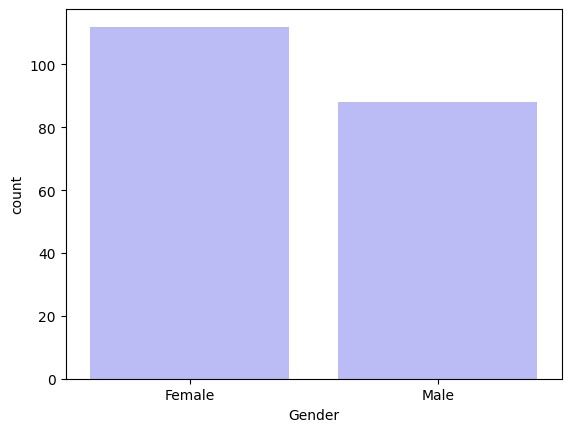

In [22]:
sns.barplot(x=df['Gender'].value_counts().index,y=df['Gender'].value_counts(),color='Blue',alpha=.3)
plt.show()

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

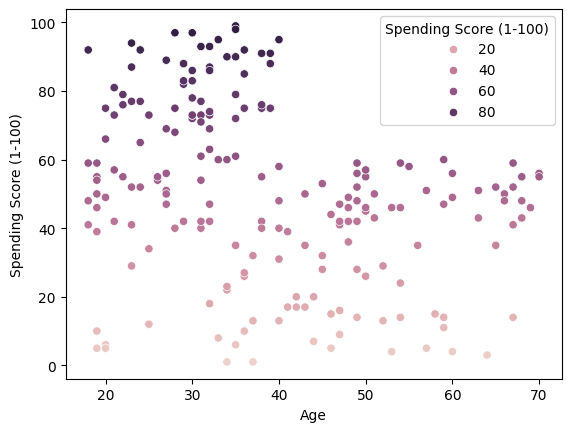

In [23]:
sns.scatterplot(df,x="Age",y="Spending Score (1-100)",hue="Spending Score (1-100)")

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

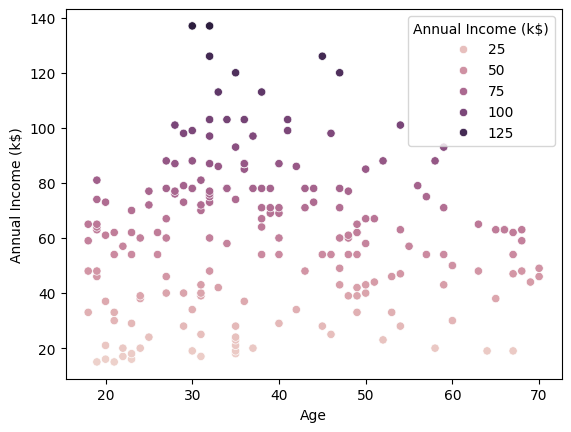

In [24]:
sns.scatterplot(df,x="Age",y="Annual Income (k$)",hue="Annual Income (k$)")

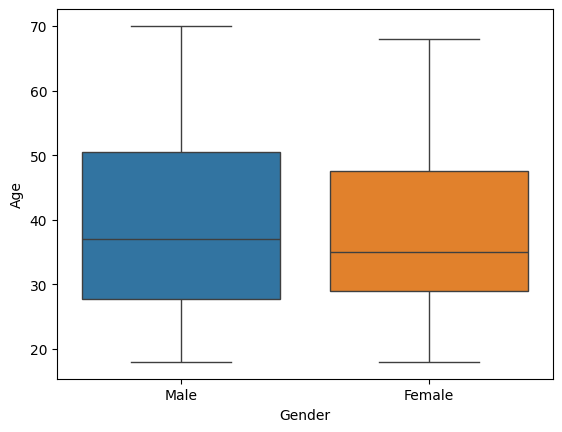

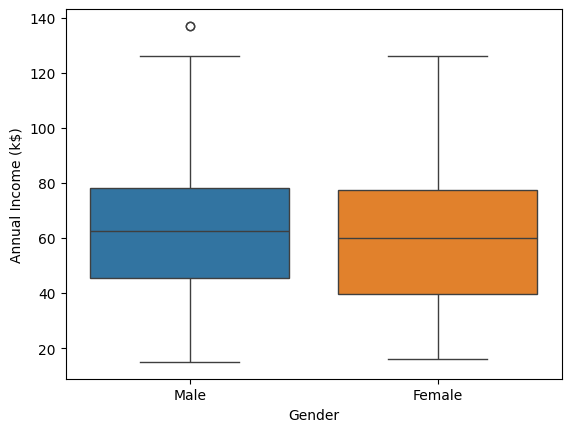

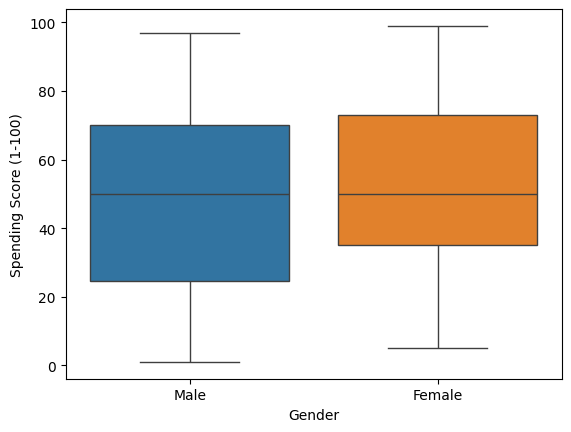

In [25]:
columns=["Age","Annual Income (k$)","Spending Score (1-100)"]
for i in columns:
    plt.figure()
    sns.boxplot (data=df,x="Gender",y=df[i],hue="Gender")

In [26]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: ylabel='count'>

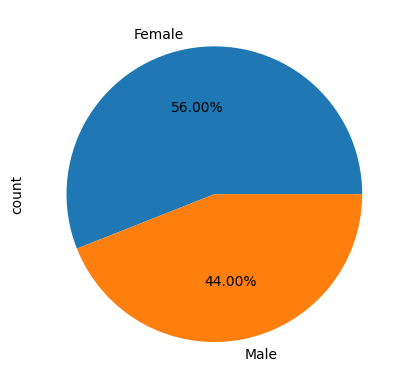

In [27]:
#plt.figure(figsize=(3,3))
pd.Series(df['Gender']).value_counts().plot(kind ='pie', autopct='%1.2f%%')

In [28]:
df.groupby('Gender').mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,,
Female,97.562500,38.098214,59.250000,51.526786
Male,104.238636,39.806818,62.227273,48.511364


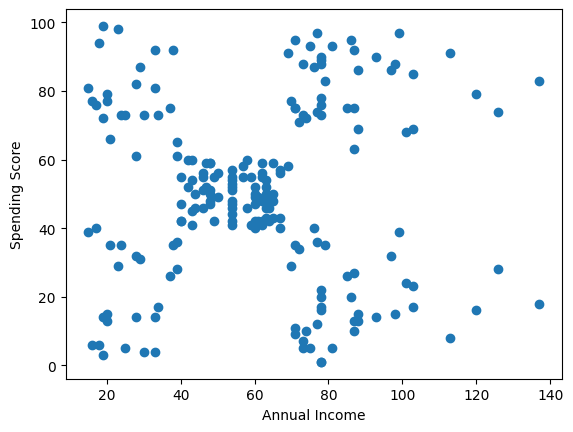

In [29]:
#plt.figure(figsize = (5, 3))
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

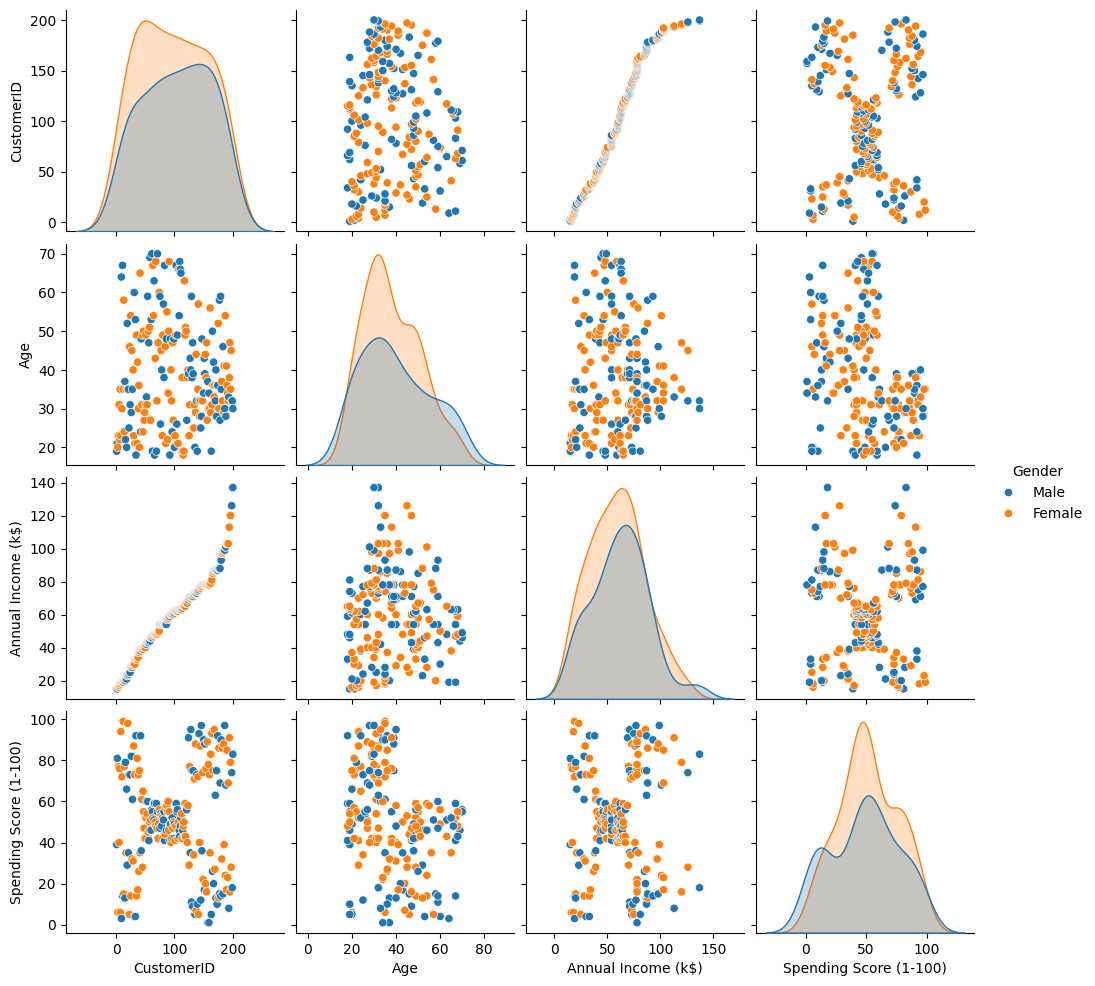

In [30]:
#df=df.drop("CustomerId",axis=1)
sns.pairplot(df,hue="Gender")

Text(0, 0.5, 'Spending Score')

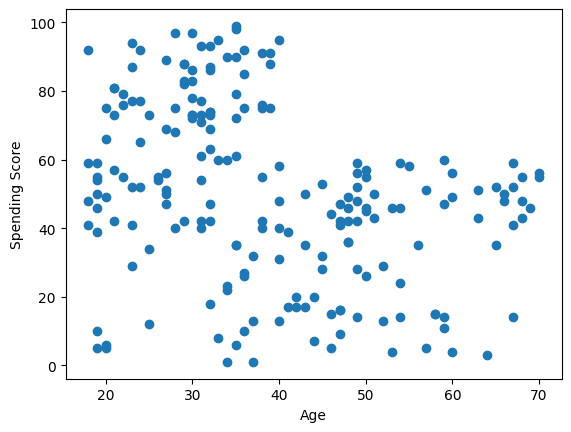

In [33]:
plt.scatter(df["Age"], df["Spending Score (1-100)"])
plt.xlabel("Age")
plt.ylabel("Spending Score")

<Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

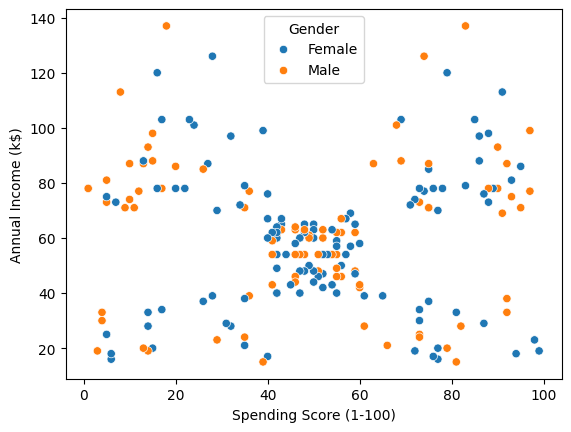

In [34]:
sns.scatterplot(data=df,x='Spending Score (1-100)',y='Annual Income (k$)',hue='Gender')

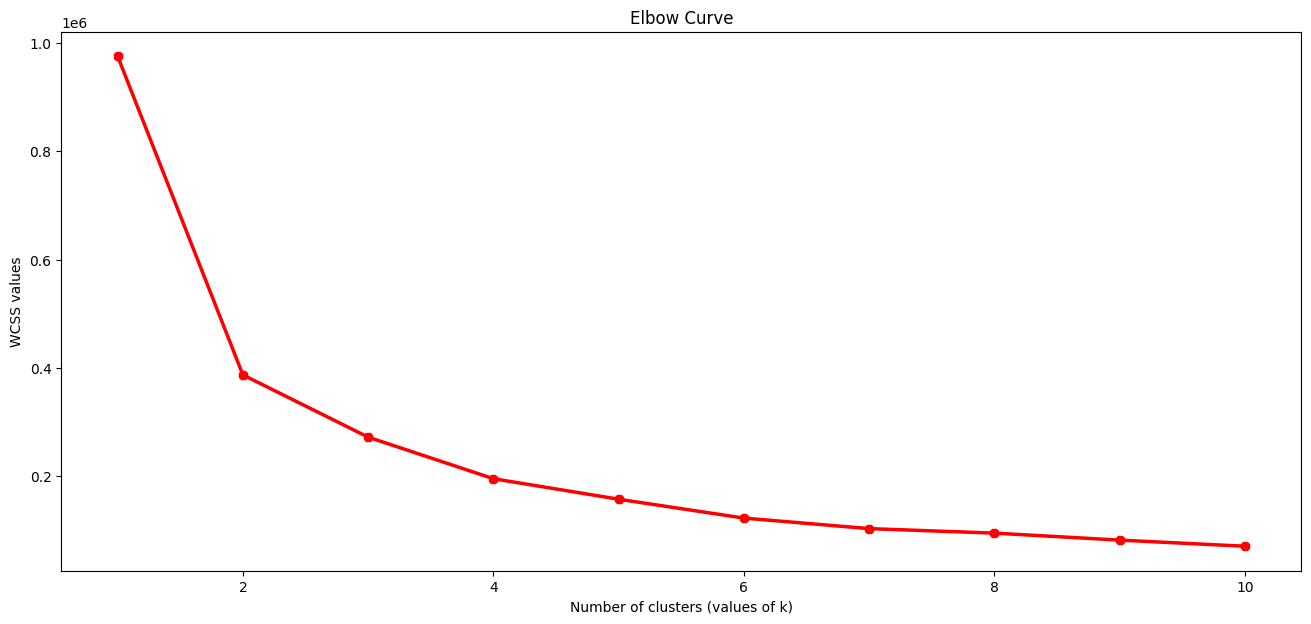

In [44]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
df_encoded = pd.get_dummies(df)

wcss = []
for i in range(1, 11):
    k_means = KMeans(n_clusters=i, n_init="auto")
    k_means.fit(df_encoded)
    wcss.append(k_means.inertia_)
    
# the elbow curve
plt.plot(range(1, 11), wcss)
plt.plot(range(1, 11), wcss, linewidth=2.5, color="red", marker="8")

plt.title("Elbow Curve")
plt.xlabel("Number of clusters (values of k)")
plt.ylabel("WCSS values")


plt.show()


In [47]:

# taking k = 5
k_means_1 = KMeans(n_clusters=5, n_init="auto")

# fitting the input data
k_means_1.fit(df_encoded)

# predicting the labels of the input data
y_pred = k_means_1.predict(df_encoded)

# adding the labels to a column named label
df["label"] = y_pred

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
11,12,Female,35,19,99,1
19,20,Female,35,23,98,1
145,146,Male,28,77,97,4
185,186,Male,30,99,97,4
167,168,Female,33,86,95,4


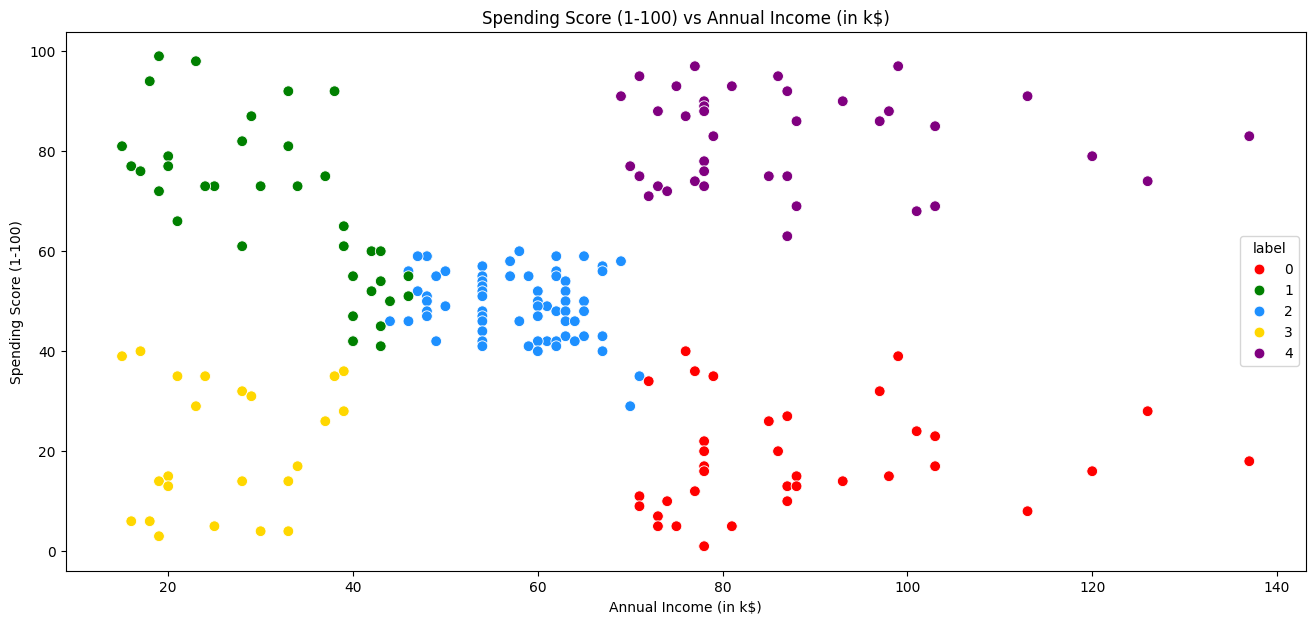

In [49]:

colors = ["red", "green", "dodgerblue", "gold", "purple"]

# scatterplot of the clusters
sns.scatterplot(
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="label", 
    palette=colors, 
    legend="full", 
    data=df, 
    s=60
)

plt.xlabel('Annual Income (in k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (in k$)')
plt.show()